# Single Neuron Model

This notebook implements the single neuron model, which encompasses the perceptron, linear regression, and logistic regression models.

These three models all have the same underlying algorithm, but different cost and activation functions. I will define a class for the single neuron model, and show how it can be used to implement the perceptron, linear regression, and logistic regression models I have fitted in their respective notebooks.

---

First, load the relevant libraries needed.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Import functions from scikit-learn to help with training/testing endeavors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## The Data

The model will be trained using the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset. This dataset contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [6]:
# Read in the data and subset it to the relevant columns/observations
hawks = pd.read_csv("../../Data/hawks.csv")
hawks = hawks[["Species", "Wing", "Tail", "Weight", "Culmen", "Hallux"]].dropna(axis=0)
hawks

,Species,Wing,Tail,Weight,Culmen,Hallux
0,RT,385.0,219,920.0,25.7,30.1
2,RT,381.0,235,990.0,26.7,31.3
3,CH,265.0,220,470.0,18.7,23.5
4,SS,205.0,157,170.0,12.5,14.3
5,RT,412.0,230,1090.0,28.5,32.2
...,...,...,...,...,...,...
903,RT,380.0,224,1525.0,26.0,27.6
904,SS,190.0,150,175.0,12.7,15.4
905,RT,360.0,211,790.0,21.9,27.6
906,RT,369.0,207,860.0,25.2,28.0


## Implementing the algorithm: a custom class

In [19]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function
        self.equation = ""

    def train(self, X, y, alpha = 0.005, epochs = 50):
        n_obs, n_features = X.shape
        self.train_errors_ = []

        # Initialize coefficients/weights and intercept/bias from a uniform distribution
        self.weights_ = np.random.rand(1 + n_features)

        # Implement stochastic gradient descent  
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.weights_[:-1] -= alpha * error * xi
                self.weights_[-1] -= alpha * error
                errors += self.cost_function(self.predict(xi), target)
            self.train_errors_.append(errors / n_obs)
        
        # Format a nice equation to print using the model weights
        self.set_equation()
    
    def set_equation(self):
        """
        Using the model weights, format a nice equation to print
        """
        eqn = f"y' = {self.weights_[-1]:.3f}"
        for i in range(0, len(self.weights_)-1):
            term = self.weights_[i]
            if (np.sign(term) < 0):
                eqn += f" - {abs(term):.3f}x_{i+1}"
            else:
                eqn += f" + {term:.3f}x_{i+1}"
        self.equation_ = eqn

    def predict(self, X):
        preactivation = np.dot(X, self.weights_[:-1]) + self.weights_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        plt.figure(figsize = (7, 5))
        plt.plot(range(1, len(self.train_errors_) + 1), self.train_errors_)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Cost Calculated After Each Iteration During Training")
        #plt.show()

    def plot_decision_boundary(self, X, y, x_title = "x", y_title = "y"):
        plt.figure(figsize = (7, 5))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(x_title, fontsize = 15)
        plt.ylabel(y_title, fontsize = 15)
        #plt.show()

## 1. The Perceptron

In [24]:
# Set up predictors matrix (X) and response vector (y)
X = hawks[["Wing", "Tail"]].to_numpy()
# Convert each entry of y with RT (red-tailed) to -1 and otherwise 1
hawks["Species_binary"] = [1 if x == "RT" else -1 for x in hawks.Species]
y = hawks["Species_binary"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [25]:
def sign_activation(z):
    return np.sign(z)

def mean_squared_error(y_hat, y):
    return .5 * (y_hat - y)**2

In [26]:
per_model = SingleNeuron(sign_activation, mean_squared_error)
per_model.train(X_train, y_train, alpha = 0.5, epochs = 10_000)
per_model.weights_

array([   846.48930505,  -1041.46739408, -66175.31217597])

In [27]:
per_model.equation_

"y' = -66175.312 + 846.489x_1 - 1041.467x_2"

### Performance/error analysis of perceptron model

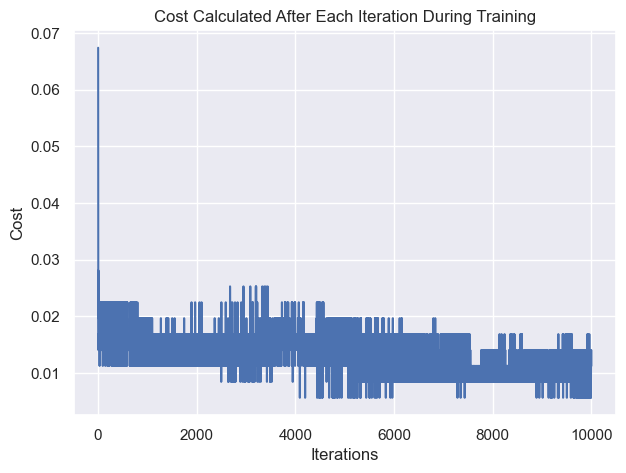

In [28]:
per_model.plot_cost_function()
plt.show()

In [29]:
# Obtain predictions for training set and find the error of the model
y_train_pred = per_model.predict(X_train)
print("Training accuracy:", sum(y_train == y_train_pred) / len(y_train))

Training accuracy: 0.9592696629213483


In [30]:
# Obtain predictions for testing set and find the test accuracy
y_test_pred = per_model.predict(X_test)
print("Testing accuracy:", sum(y_test == y_test_pred) / len(y_test))

Testing accuracy: 0.9832402234636871


In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        73
           1       0.98      0.99      0.99       106

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179



In [41]:
def plot_RT_confusion_matrix(y_actual, y_pred):
    """
    Plots the confusion matrix given the actual and predicted values
    to easily view accurate classifications and type I/II errors
    """  
    # want to invert the order of the classes in outputted matrix (have 1 on top row/left column)        
    classes = np.unique(y_actual)[::-1] 
    # Obtain confusion matrix
    cf_matrix = confusion_matrix(y_actual, y_pred, labels = classes)

    # View the confusion matrix using the seaborn package
    plt.figure(figsize = (6, 4))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Hawk Species Classification Confusion Matrix\n', fontsize = 14)
    ax.set_xlabel('\nPredicted Values', fontsize = 12)
    ax.set_ylabel('Actual Values ', fontsize = 12)
    ax.xaxis.set_ticklabels(["RT", "Not RT"])
    ax.yaxis.set_ticklabels(["RT", "Not RT"])

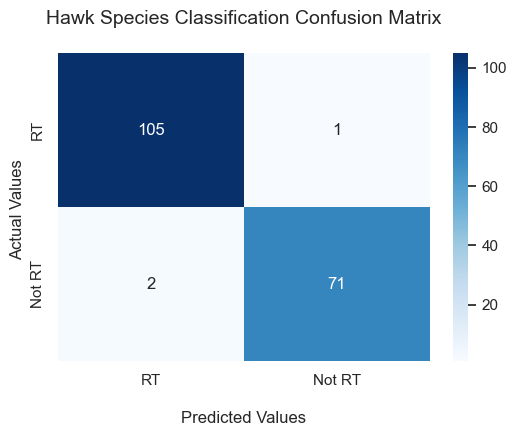

In [43]:
plot_RT_confusion_matrix(y_test, y_test_pred)
plt.show()

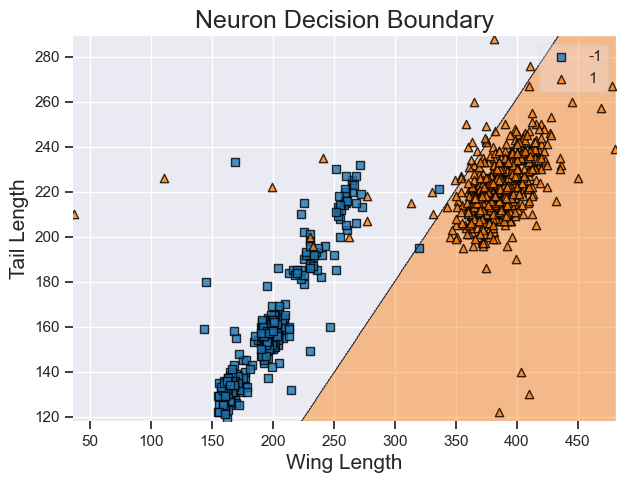

In [44]:
per_model.plot_decision_boundary(X, y, x_title = "Wing Length", y_title = "Tail Length")

## 2. Logistic Regression

In [11]:
def sigmoid_activation(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [12]:
# Using same predictors matrix (X) as in model 1

# Convert each entry of y with RT (red-tailed) to 1 and otherwise 0
hawks["Species_binary2"] = [1 if x == "RT" else 0 for x in hawks.Species]
y2 = hawks["Species_binary2"].to_numpy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.20, random_state=1)

In [14]:
log_model = SingleNeuron(sigmoid_activation, cross_entropy_loss)
log_model.train(X_train2, y_train2, alpha = 0.005, epochs = 10_000)
print(log_model.weights_)

/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_4503/2336742726.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))
/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_4503/2336742726.py:5: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_4503/2310773974.py:53: RuntimeWarning: invalid value encountered in double_scalars
  errors += self.cost_function(self.predict(xi), target)
/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_4503/2336742726.py:5: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


[ 187317.11244469 -317878.71257551   -5287.83081249]


In [15]:
print(log_model.equation_)

y' = -5287.831 + 187317.112x_1 - 317878.713x_2


## 3. Linear Regression

In [ ]:
def linear_regression_activation(z):
    return z

# No need to define a new cost function, as linear regression uses mean squared error too